# Context

Createa a car price prediction model using a dataset from [kaggle competition](https://www.kaggle.com/datasets/CooperUnion/cardataset). 

Cars dataset with features including make, model, year, engine, and other properties of the car used to predict its price. Here we want to predict the Manufacturer's Suggested Retail Price (MSRP). 

# Load Libararies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# Load Data

In [3]:
df = pd.read_csv('./data/02-Car Price Prediction Kaggle.csv')

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Data Preparation

## Column Names

In [5]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [6]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

## Categorical Features

In [8]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [10]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory Data Analysis

In [11]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

## Price Distribution

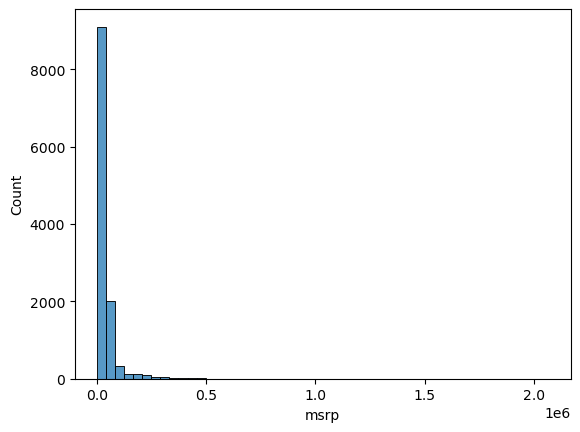

In [12]:
sns.histplot(df['msrp'], bins=50)
plt.show()

There are a few cars valued more than one million dollar. So, we want to zoom in on the left part.

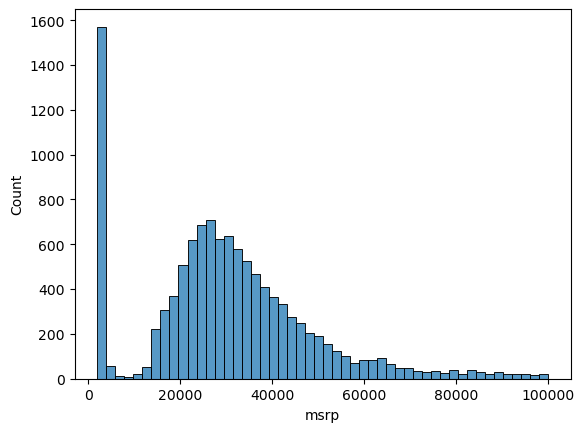

In [20]:
sns.histplot(df['msrp'][df['msrp'] < 100_000], bins=50)
plt.show()

This kind of distributions are not good for machine learning and the tail can confuse our model. So, in order to get rid of that tail, we usually apply logarithm distribution.

### Logarithm

In [21]:
np.log([0, 1, 10, 100, 1000, 10000])

/tmp/ipykernel_4731/4052340418.py:1: RuntimeWarning: divide by zero encountered in log
  np.log([0, 1, 10, 100, 1000, 10000])


array([      -inf, 0.        , 2.30258509, 4.60517019, 6.90775528,
       9.21034037])

Note that value of logarithm zero is not defined. It is not the case for our problem, but it is pretty common to add one to the values. So, we are sure that the logarithm of zero is one.

In [22]:
np.log([0+1, 1+1, 10+1, 100+1, 1000+1, 10000+1])

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478,
       9.21044037])

In [23]:
np.log1p([0, 1, 10, 100, 1000, 10000])

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478,
       9.21044037])

In [24]:
price_log = np.log1p(df['msrp'])

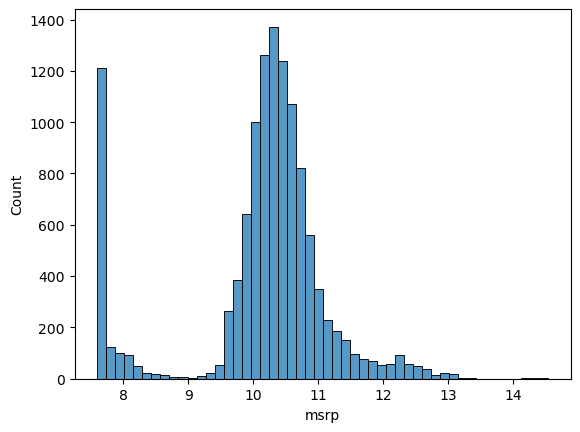

In [25]:
sns.histplot(price_log, bins=50)
plt.show()

Now, it is similar to normal distribution.

## Missing Values

In [26]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting up the Validation Framework

## Define Train, Validation, and Test Data

In [27]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
# n_train = int(n * 0.6) we don't use it because of rounding error of int
n_train = n - n_val - n_test 

In [28]:
n_train, n_val, n_test

(7150, 2382, 2382)

In [29]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

In [30]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7146,mazda,navajo,1994,regular_unleaded,160.0,6.0,manual,four_wheel_drive,2.0,NaN,compact,2dr_suv,18,14,586,2000
7147,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,20,15,61,65055
7148,lincoln,navigator,2015,regular_unleaded,365.0,6.0,automatic,four_wheel_drive,4.0,luxury,large,4dr_suv,19,15,61,67220


The problem is that we have all the bmws in the train set. There is an order in the dataset, so we need to shuffle the data.

## Shuffle Data

In [31]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [32]:
# define seeds to makes the result reproducible
# you will have the same results if the version of numpy is the same
np.random.seed(2)
np.random.shuffle(idx)

In [33]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [34]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [35]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [36]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [37]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

## Define the Dependent Variable

In [38]:
y_train = np.log1p(df_train['msrp'].values)
y_val = np.log1p(df_val['msrp'].values)
y_test = np.log1p(df_test['msrp'].values)

## Remove the Dependent Variable

In [39]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# Linear Regression

In [40]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [41]:
xi = [453, 11, 86]

In [42]:
w0 = 7.17 # This is our prediction for the price of the car, if we don't know anything about the car. Bias term.
w = [0.01, 0.04, 0.002]

In [43]:
def linear_regression(xi):
    n = len(xi)
    
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
    
    return pred

In [44]:
linear_regression(xi)

12.312

In [45]:
np.exp(12.312) - 1 # The price of the car, we do -1 to undo the +1 we did in the log

222347.2221101062

In [46]:
np.log1p(222347.2221101062)

12.312

## Linear Regression Vector Form

In [55]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + w[j] * xi[j]
        
    return res

In [69]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [70]:
w_new = [w0] + w

In [71]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [72]:
linear_regression(xi)

12.312

In [79]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [80]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

In [81]:
X = [x1, x2, x10]

In [84]:
X= np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [86]:
def linear_regression(X):
    return X.dot(w_new)

In [87]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

# Training a Linear Regression Model

In [155]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [144]:
ones = np.ones(X.shape[0])

In [145]:
X = np.column_stack([ones, X])

In [156]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [147]:
XTX = X.T.dot(X)

In [148]:
XTX_inv = np.linalg.inv(XTX)

In [149]:
XTX.dot(XTX_inv).round(1)

array([[ 1., -0.,  0.,  0.],
       [ 0.,  1.,  0., -0.],
       [ 0.,  0.,  1.,  0.],
       [ 0., -0.,  0.,  1.]])

In [150]:
w_full = XTX_inv.dot(X.T).dot(y)

In [151]:
w0 = w_full[0]
w = w_full[1:]

In [152]:
w0, w

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [157]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [159]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [160]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [161]:
train_linear_regression(X, y)

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

# Car Price Baseline Model

In [163]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

We use these numeric values to build our baseline model.

In [164]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [167]:
X_train = df_train[base].values

In [172]:
X_train = df_train[base].fillna(0).values

In [173]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [175]:
w0, w = train_linear_regression(X_train, y_train)

In [176]:
y_pred = w0 + X_train.dot(w)

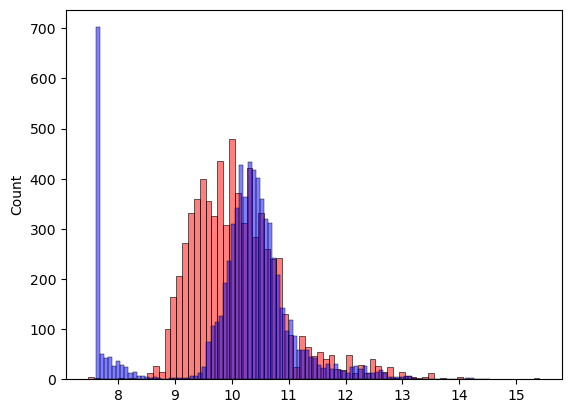

In [178]:
sns.histplot(y_pred, color='red', alpha=0.5)
sns.histplot(y_train, color='blue', alpha=0.5)
plt.show()

# Performance Measure (RMSE)

In [181]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [182]:
rmse(y_train, y_pred)

0.7554192603920132

# Validating the Model

In [192]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [195]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [196]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301601

# Simple Feature Engineering

Suppose now we want to calculate how old the cars are:

In [198]:
df_train['year'].max()

2017

In [199]:
2017 - df_train['year']

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [205]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df['year']
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [206]:
X_train = prepare_X(df_train)

In [208]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058335

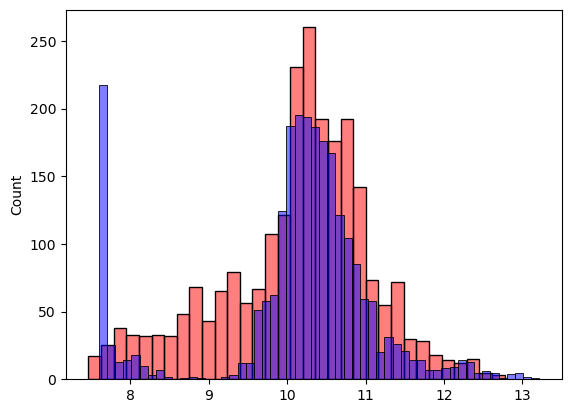

In [209]:
sns.histplot(y_pred, color='red', alpha=0.5)
sns.histplot(y_val, color='blue', alpha=0.5)
plt.show()

# Categorical Variables

In [211]:
for v in [2, 3, 4]:
    df_train[f'num_doors_{v}'] = (df_train['number_of_doors'] == v).astype('int')

In [213]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df['year']
    features.append('age')
    
    for v in [2, 3, 4]:
        df[f'num_doors_{v}'] = (df['number_of_doors'] == v).astype('int')
        features.append(f'num_doors_{v}')
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [214]:
prepare_X(df_train)

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [285.,   6.,  22., ...,   0.,   0.,   1.],
       [563.,  12.,  21., ...,   0.,   0.,   1.],
       [200.,   4.,  31., ...,   0.,   0.,   1.]])

In [215]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5157995641502353

In [220]:
makes = list(df['make'].value_counts().head().index)

In [221]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df['year']
    features.append('age')
    
    for v in [2, 3, 4]:
        df[f'num_doors_{v}'] = (df['number_of_doors'] == v).astype('int')
        features.append(f'num_doors_{v}')
    
    for v in makes:
        df[f'make_{v}'] = (df['make'] == v).astype('int')
        features.append(f'make_{v}')
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [222]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5076038849557035

In [223]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
num_doors_2            int64
num_doors_3            int64
num_doors_4            int64
dtype: object

In [226]:
categorical_variables = ['make','engine_fuel_type', 'transmission_type', 'driven_wheels', 
              'market_category', 'vehicle_size', 'vehicle_style']

In [227]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [228]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [230]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df['year']
    features.append('age')
    
    for v in [2, 3, 4]:
        df[f'num_doors_{v}'] = (df['number_of_doors'] == v).astype('int')
        features.append(f'num_doors_{v}')
    
    for c, values in categories.items():
        for v in values:
            df[f'{c}_{v}'] = (df[c] == v).astype('int')
            features.append(f'{c}_{v}')
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [231]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

23.370682839235876

# Regularization

If there is a duplication of columns, the `XTX_inv` will not be available.  

In [256]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001]
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [257]:
y = [1, 2, 3, 1, 2, 3]

In [258]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [259]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.86409478e-02, -1.26839821e+05,  1.26839770e+05],
       [-1.26839767e+05,  2.88638033e+14, -2.88638033e+14],
       [ 1.26839727e+05, -2.88638033e+14,  2.88638033e+14]])

In [260]:
XTX_inv.dot(X.T).dot(y)

array([-1.93908875e-01, -3.61854375e+06,  3.61854643e+06])

We can add a small number to the diagonal of the `XTX_inv`.

In [278]:
XTX = [
    [1.01, 2, 2],
    [2, 1.01, 1.0000001],
    [2, 1.0000001, 1.01]
]

XTX = np.array(XTX)

In [279]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

In [280]:
XTX = XTX + np.eye(3) * 0.01

In [281]:
np.linalg.inv(XTX)

array([[ -0.34009026,   0.33672302,   0.33672302],
       [  0.33672302,  24.91426063, -25.08598937],
       [  0.33672302, -25.08598937,  24.91426063]])

In [285]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [286]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4565175086998797

# Tuning the Model

In [287]:
for r in [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0 6.285517742466579 0.4565175086998797
1e-05 6.285517742466579 0.4565175086998797
0.0001 6.285517742466579 0.4565175086998797
0.001 6.285517742466579 0.4565175086998797
0.01 6.285517742466579 0.4565175086998797
0.1 6.285517742466579 0.4565175086998797
1 6.285517742466579 0.4565175086998797
10 6.285517742466579 0.4565175086998797


In [288]:
r = 0.001

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.4565175086998797

# Using the Model

In [294]:
df_full_train = pd.concat([df_train, df_val])

In [296]:
df_full_train = df_full_train.reset_index(drop=True)

In [297]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_doors_2,num_doors_3,num_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1.0,0.0,0.0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0.0,0.0,1.0
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0.0,0.0,1.0
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0.0,1.0,0.0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870,NaN,NaN,NaN
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238,NaN,NaN,NaN
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624,NaN,NaN,NaN
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436,NaN,NaN,NaN


In [298]:
X_full_train = prepare_X(df_full_train)

In [299]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [301]:
y_full_train = np.concatenate([y_train, y_val])

In [302]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [304]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.4517749304665327

The difference between valiation and test error is not too much and it means that the model generalizes good.

In [306]:
car = df_test.iloc[10].to_dict()
car

{'make': 'mazda',
 'model': '3',
 'year': 2016,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 155.0,
 'engine_cylinders': 4.0,
 'transmission_type': 'manual',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'compact',
 'vehicle_style': 'sedan',
 'highway_mpg': 41,
 'city_mpg': 29,
 'popularity': 586}

In [307]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,mazda,3,2016,regular_unleaded,155.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,41,29,586


In [308]:
X_small = prepare_X(df_small)

In [310]:
y_pred = w0 + X_test.dot(w)
y_pred = y_pred[0]
y_pred

8.270390338411689

In [311]:
np.exp(y_pred) + 1

3907.4735412670098

In [313]:
np.exp(y_test[10]) + 1

17846.999999999993